In [1]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

##### Read in data on world's administrative boundaries from [here](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip)

In [2]:
# read in world data 

columns = ['CONTINENT','NAME_LONG', 'SUBREGION', 'geometry']
world_data = gpd.read_file('zip://data/ne_110m_admin_0_countries.zip')[columns]

world_data.head(2)

,CONTINENT,NAME_LONG,SUBREGION,geometry
0,Oceania,Fiji,Melanesia,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,Eastern Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [3]:
# subset Africa from world map

africa = world_data[world_data['CONTINENT'] == 'Africa']
africa = africa.reset_index(drop=True)

africa.head(2)

,CONTINENT,NAME_LONG,SUBREGION,geometry
0,Africa,Tanzania,Eastern Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
1,Africa,Western Sahara,Northern Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


#### Climate

<b> I am reading in world climate data dowloaded from [here](https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson) </b>

In [4]:
climate_df  = gpd.read_file('data/IPCC_ClimateZoneMap_Vector.geojson')
climate_df.crs = {'epsg':4326}

# standardizing column names
climate_df.columns = climate_df.columns.str.lower()
climate_df.head()

,class_name,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."


<AxesSubplot:>

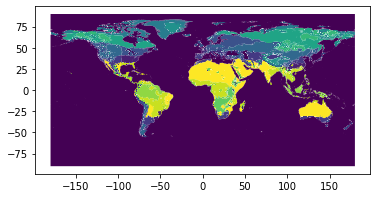

In [5]:
climate_df.plot(column = 'class_name')

### I want to view the climate of Africa alone

<b> This is where I have the issue

In [6]:
climate_df.clip(africa)

TypeError: '>=' not supported between instances of 'Polygon' and 'Polygon'